## 1.1   Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('pca', PCA()),
    ('rf_clf', RandomForestClassifier())
])

In [6]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA()),
                ('rf_clf', RandomForestClassifier())])

In [7]:
rf_predicted = rf_pipeline.predict(X_test)
rf_predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [8]:
rf_pipeline.score(X_test, y_test).round(3)

0.967

______

In [9]:
# GridSearch
parameters = {'rf_clf__n_estimators':[1,10,20,30,40,50,100], 'rf_clf__min_samples_leaf':range(1,10)}

grid = GridSearchCV(rf_pipeline, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rf_clf', RandomForestClassifier())]),
             param_grid={'rf_clf__min_samples_leaf': range(1, 10),
                         'rf_clf__n_estimators': [1, 10, 20, 30, 40, 50, 100]})

In [10]:
grid.best_params_

{'rf_clf__min_samples_leaf': 1, 'rf_clf__n_estimators': 20}

In [11]:
gs_predicted = grid.predict(X_test)
gs_predicted

array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [12]:
grid.score(X_test, y_test).round(3)

0.933

## 1.2    Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

In [14]:
text_raw = """
Oh, yeah
Mmm
Still don't know what I was waitin' for
And my time was runnin' wild
A million dead end streets and
Every time I thought I'd got it made
It seemed the taste was not so sweet
So I turned myself to face meBut I've never caught a glimpse
How the others must see the faker
I'm much too fast to take that test
Ch-ch-ch-ch-changes
Turn and face the strange
Ch-ch-changes
Don't want to be a richer man
Ch-ch-ch-ch-changes
Turn and face the strange
Ch-ch-changes
There's gonna have to be a different man
Time may change me
But I can't trace time
Mmm, yeah
I watch the ripples change their size
But never leave the stream
Of warm impermanence
And so the days float through my eyes
But still the days seem the same
And these children that you spit on
As they try to change their worlds
Are immune to your consultations
They're quite aware of what they're goin' through
Ch-ch-ch-ch-changes
Turn and face the strange
Ch-ch-changes
Don't tell them to grow up and out of it
Ch-ch-ch-ch-changes
Turn and face the strange
Ch-ch-changes
Where's your shame?
You've left us up to our necks in it
Time may change me
But you can't trace time
Strange fascinations fascinate me 
Ah, changes are taking
The pace I'm goin' through
Ch-ch-ch-ch-changes
Turn and face the strange
Ch-ch-changes
Ooh, look out, you rock 'n' rollers
Ch-ch-ch-ch-changes
Turn and face the strange
Ch-ch-changes
Pretty soon now you're gonna get older
Time may change me
But I can't trace time
I said that time may change me
But I can't trace time"""

text_raw

"\nOh, yeah\nMmm\nStill don't know what I was waitin' for\nAnd my time was runnin' wild\nA million dead end streets and\nEvery time I thought I'd got it made\nIt seemed the taste was not so sweet\nSo I turned myself to face meBut I've never caught a glimpse\nHow the others must see the faker\nI'm much too fast to take that test\nCh-ch-ch-ch-changes\nTurn and face the strange\nCh-ch-changes\nDon't want to be a richer man\nCh-ch-ch-ch-changes\nTurn and face the strange\nCh-ch-changes\nThere's gonna have to be a different man\nTime may change me\nBut I can't trace time\nMmm, yeah\nI watch the ripples change their size\nBut never leave the stream\nOf warm impermanence\nAnd so the days float through my eyes\nBut still the days seem the same\nAnd these children that you spit on\nAs they try to change their worlds\nAre immune to your consultations\nThey're quite aware of what they're goin' through\nCh-ch-ch-ch-changes\nTurn and face the strange\nCh-ch-changes\nDon't tell them to grow up and o

In [15]:
token_word = word_tokenize(text_raw)
print(token_word)

['Oh', ',', 'yeah', 'Mmm', 'Still', 'do', "n't", 'know', 'what', 'I', 'was', 'waitin', "'", 'for', 'And', 'my', 'time', 'was', 'runnin', "'", 'wild', 'A', 'million', 'dead', 'end', 'streets', 'and', 'Every', 'time', 'I', 'thought', 'I', "'d", 'got', 'it', 'made', 'It', 'seemed', 'the', 'taste', 'was', 'not', 'so', 'sweet', 'So', 'I', 'turned', 'myself', 'to', 'face', 'meBut', 'I', "'ve", 'never', 'caught', 'a', 'glimpse', 'How', 'the', 'others', 'must', 'see', 'the', 'faker', 'I', "'m", 'much', 'too', 'fast', 'to', 'take', 'that', 'test', 'Ch-ch-ch-ch-changes', 'Turn', 'and', 'face', 'the', 'strange', 'Ch-ch-changes', 'Do', "n't", 'want', 'to', 'be', 'a', 'richer', 'man', 'Ch-ch-ch-ch-changes', 'Turn', 'and', 'face', 'the', 'strange', 'Ch-ch-changes', 'There', "'s", 'gon', 'na', 'have', 'to', 'be', 'a', 'different', 'man', 'Time', 'may', 'change', 'me', 'But', 'I', 'ca', "n't", 'trace', 'time', 'Mmm', ',', 'yeah', 'I', 'watch', 'the', 'ripples', 'change', 'their', 'size', 'But', 'never

In [16]:
word_freq = FreqDist(token_word)
word_freq.most_common(20)

[('the', 14),
 ('I', 12),
 ('and', 8),
 ('to', 8),
 ("n't", 7),
 ('time', 7),
 ('face', 7),
 ('Ch-ch-ch-ch-changes', 6),
 ('Turn', 6),
 ('strange', 6),
 ('Ch-ch-changes', 6),
 ('change', 6),
 ('But', 6),
 (',', 5),
 ("'", 5),
 ('me', 5),
 ('may', 4),
 ('ca', 4),
 ('trace', 4),
 ('you', 4)]

## 2.1  Treu les stopwords i realitza stemming al teu conjunt de dades.


In [17]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'then', 'being', 'himself', 'few', 'during', 'don', 'about', "isn't", 'by', 'no', 'an', 'those', 'me', 'these', 'wouldn', 'wasn', 'under', 'are', 'ours', 'until', 'when', 'that', 'my', 'very', 'some', 'y', 'were', 'such', 've', 'been', 'hadn', "shouldn't", 'weren', 'they', 'because', 'do', 'it', 'or', "couldn't", 'why', 'itself', 'mightn', "shan't", 'd', 's', 'has', 'doing', 'before', 'she', "you've", 'than', 'from', 'of', 'who', 't', "you'd", 'm', 'won', 'we', 'was', 'so', 'not', 'll', 'as', 'over', 'against', 'did', "mightn't", 'didn', 'own', "haven't", 'hasn', "don't", 'a', 'ma', 'am', 'down', 'the', 'herself', 'but', 'same', "weren't", 'your', 'theirs', 're', 'our', 'just', 'now', "doesn't", 'haven', 'his', 'yourselves', 'i', 'in', "hadn't", 'couldn', 'their', 'out', 'too', "aren't", 'most', 'can', "should've", 'above', "you're", 'yours', 'what', 'on', 'ain', 'at', 'any', 'this', 'each', 'if', "wouldn't", "didn't", 'while', 'needn', 'themselves', 'its', 'nor', "you'll", 'shouldn',

In [18]:
filtered_words = [w for w in token_word if w not in stop_words]
print(filtered_words)

['Oh', ',', 'yeah', 'Mmm', 'Still', "n't", 'know', 'I', 'waitin', "'", 'And', 'time', 'runnin', "'", 'wild', 'A', 'million', 'dead', 'end', 'streets', 'Every', 'time', 'I', 'thought', 'I', "'d", 'got', 'made', 'It', 'seemed', 'taste', 'sweet', 'So', 'I', 'turned', 'face', 'meBut', 'I', "'ve", 'never', 'caught', 'glimpse', 'How', 'others', 'must', 'see', 'faker', 'I', "'m", 'much', 'fast', 'take', 'test', 'Ch-ch-ch-ch-changes', 'Turn', 'face', 'strange', 'Ch-ch-changes', 'Do', "n't", 'want', 'richer', 'man', 'Ch-ch-ch-ch-changes', 'Turn', 'face', 'strange', 'Ch-ch-changes', 'There', "'s", 'gon', 'na', 'different', 'man', 'Time', 'may', 'change', 'But', 'I', 'ca', "n't", 'trace', 'time', 'Mmm', ',', 'yeah', 'I', 'watch', 'ripples', 'change', 'size', 'But', 'never', 'leave', 'stream', 'Of', 'warm', 'impermanence', 'And', 'days', 'float', 'eyes', 'But', 'still', 'days', 'seem', 'And', 'children', 'spit', 'As', 'try', 'change', 'worlds', 'Are', 'immune', 'consultations', 'They', "'re", 'qui

In [19]:
f_word_freq = FreqDist(filtered_words)
f_word_freq.most_common(20)

[('I', 12),
 ("n't", 7),
 ('time', 7),
 ('face', 7),
 ('Ch-ch-ch-ch-changes', 6),
 ('Turn', 6),
 ('strange', 6),
 ('Ch-ch-changes', 6),
 ('change', 6),
 ('But', 6),
 (',', 5),
 ("'", 5),
 ('may', 4),
 ('ca', 4),
 ('trace', 4),
 ('And', 3),
 ('Time', 3),
 ("'re", 3),
 ('yeah', 2),
 ('Mmm', 2)]

In [20]:
ps = PorterStemmer()
stemmed_words = [ps.stem(w) for w in filtered_words]
print(stemmed_words)

['oh', ',', 'yeah', 'mmm', 'still', "n't", 'know', 'i', 'waitin', "'", 'and', 'time', 'runnin', "'", 'wild', 'a', 'million', 'dead', 'end', 'street', 'everi', 'time', 'i', 'thought', 'i', "'d", 'got', 'made', 'it', 'seem', 'tast', 'sweet', 'so', 'i', 'turn', 'face', 'mebut', 'i', "'ve", 'never', 'caught', 'glimps', 'how', 'other', 'must', 'see', 'faker', 'i', "'m", 'much', 'fast', 'take', 'test', 'ch-ch-ch-ch-chang', 'turn', 'face', 'strang', 'ch-ch-chang', 'do', "n't", 'want', 'richer', 'man', 'ch-ch-ch-ch-chang', 'turn', 'face', 'strang', 'ch-ch-chang', 'there', "'s", 'gon', 'na', 'differ', 'man', 'time', 'may', 'chang', 'but', 'i', 'ca', "n't", 'trace', 'time', 'mmm', ',', 'yeah', 'i', 'watch', 'rippl', 'chang', 'size', 'but', 'never', 'leav', 'stream', 'of', 'warm', 'imperman', 'and', 'day', 'float', 'eye', 'but', 'still', 'day', 'seem', 'and', 'children', 'spit', 'as', 'tri', 'chang', 'world', 'are', 'immun', 'consult', 'they', "'re", 'quit', 'awar', "'re", 'goin', "'", 'ch-ch-ch-

In [21]:
s_word_freq = FreqDist(stemmed_words)
s_word_freq.most_common(20)

[('i', 12),
 ('time', 10),
 ("n't", 7),
 ('turn', 7),
 ('face', 7),
 ('strang', 7),
 ('chang', 7),
 ('ch-ch-ch-ch-chang', 6),
 ('ch-ch-chang', 6),
 ('but', 6),
 (',', 5),
 ("'", 5),
 ('may', 4),
 ('ca', 4),
 ('trace', 4),
 ('and', 3),
 ("'re", 3),
 ('yeah', 2),
 ('mmm', 2),
 ('still', 2)]

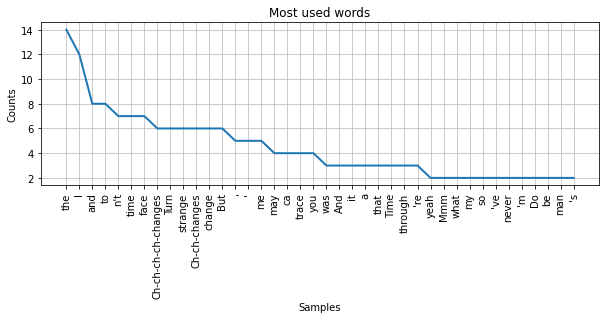

In [22]:
plt.figure(figsize=(10, 3))
plt.title('Most used words')
word_freq.plot(40, cumulative=False)
plt.show()

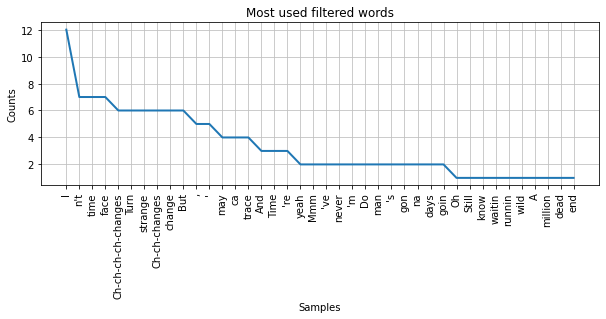

In [23]:
plt.figure(figsize=(10, 3))
plt.title('Most used filtered words')
f_word_freq.plot(40, cumulative=False)
plt.show()

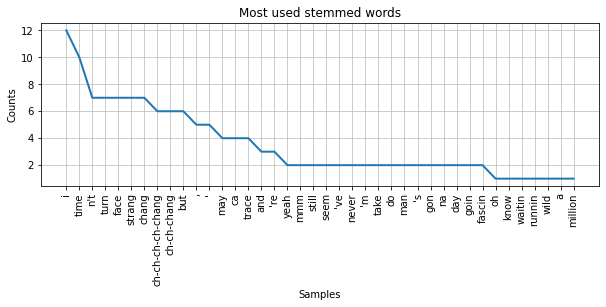

In [24]:
plt.figure(figsize=(10, 3))
plt.title('Most used stemmed words')
s_word_freq.plot(40, cumulative=False)
plt.show()

___